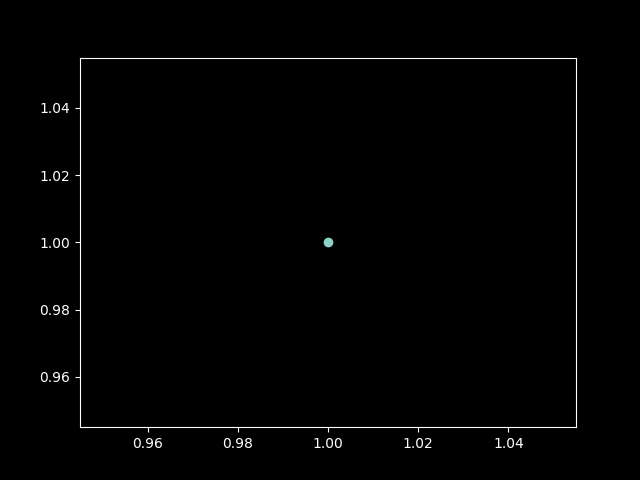

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
# from ipywidgets import Button, Layout, jslink, IntText, IntSlider, interactive, interact, HBox, Layout, VBox

plt.figure()
plt.plot(1,1,"o")
plt.show()


## Thresholding analysis
The threshold is computed by optimizing the SNR:

$$ SNR_1(T) = F_{True,pos}(T)\frac{S \times F_{e^->0,ADU>T}}{\sqrt{ F_{e^->0,ADU>T} \times(S + \sigma_{CIC}^2 + \sigma_{DC}^2+ \sigma_{SKY}^2)  + F_{e^-=0,ADU>T} \frac{\sigma_{RN}^2}{Gain} }} 
\sim F_{True,pos}(T) \frac{S \sqrt{ F_{e^->0,ADU>T}}}{\sqrt{S + \sigma_{CIC}^2 + \sigma_{DC}^2+ \sigma_{SKY}^2 }}$$



with:
- $\sigma_{RN}^2=\frac{RN}{G_{EM}} \times \frac{\sum RN[RN>T]}{\sum RN} = \frac{RN}{EMgain}  \times \%pix_{e^-=0}^{ADU>T}$: ie 60e-/2000 x the fraction of pixels above the threshold which dit not receive any photo-electrons -->
- $ F_{e^->0,ADU>T}$ :  fraction of pixels above the threshold which received more than 0 electons
- $ F_{e^-=0,ADU>T}$ :  fraction of pixels above the threshold which did not receive any electron
- $F_{True,pos} = \frac{F_{e^->0,ADU>T}}{F_{ADU>T}} $ : the fraction of true positives = the fraction of pixels above the threshold which received more than 0 electons. This uncertainty term is not in the final SNR formula as it converges towards ~1 after stacking as the average pixel value will converge towards the real number of incoming photo-electrons


The thresholding depends on 5 factors:
- **The gain**: the higher the gain the easier it is to differentiate pixels who received a photo-electron and those which did not
- **The read noise**: the lower the RN the easier it is to differentiate pixels who received a photo-electron and those which did not
- **The low CTE** smears the charges, from pixels who did receive a photo-electron to pixel who did not and lower the effective gain $G_{EM,eff}$
- **The signal**: because thresholding only allows to recover 0 and 1, thresholding is only efficient at flux <<1e-/exp 
- **The additional noise**: $\sigma = \sigma_{CIC}^2 + \sigma_{DC}^2+ \sigma_{SKY}^2$ has relatively small impact on the impact of the thresholding

**At the end, the thresholding impact is:**
- Highly non linear, many things to learn
- The efficiency of the thresholding depends mostly of the ratio $\frac{G_{EM,eff}}{RN}$, which extremely impacted by the smearing.
- The thresholding SNR gain ($SNR_{threshold}$ /$SNR_{analogic}$) lies within $[0,\sqrt{2}]$. Condditions are pretty stricts to get som thresholding efficiency and smearing makes the upper bound falls dramatically. 
- Therefore if might not worth it to loose SNR in order to be in these very conditions as we will loose it anyway in the final budget.
- The thresholding SNR gain seems less impacted by read noise. Which means that if we manage to do some (linear?) inversion of the smearing which increases the noise, it might still increase the thresholding gain above 1. 
- The only real game changer in terms of SNR is the smearing 
- **Fraction kept (photo-electrons above threshold)**
    - Important dependance on smearing and flux, less important one on gain and read noise.
    - At low smearing the bigger the ratio gain/ron the higher the fraction of charges kept.
    - Evolution with smearing is dramatic, higher gain does not help much, lower RN helps
    - Fraction increase with flux 
- **Fraction fake detections (0e- pixels above threshold)**
    - Increases importantly with smearing
    - does not depend much on read noise (small positive correlation)
    - decreases with gain
    - Increases as Flux increase. Not sure to understand why... Maybe because the number of pixels with 0 photo-e- cecreases 
- **Thresholding SNR gain**
    - Thresholding is efficient only if >1
    - Dramatically decreases with smearing (No interest of thrsholding above smearing legth of 0.6)
    - Increases with gain and decreases with read noise if no smearing
    - if smearing, the read noise has no impact.
    - Increases with flux
- **Threshold**
    - increase extremely with smearing
    - Without smearing, poor dependance on gain and readnoise
    - If smearing, increases as readnoise decreases
    - If smearing: Increasing with gain!
    - Increases with flux




|   **Thresholding dependancy table**                   | **Smearing <br />  ( 0 - 2 )** | **Read noise  <br /> ( 30 - 120 )** | **Gain  <br /> ( 800 - 2500 )** | **Flux <br /> ( 0.01 - 1.5 )** |
|:--------------------:|:------------------:|:-----------------------:|:-------------------:|:------------------:|
|     **Photo-electron Fraction kept**    |    --- <br /> 92% - 66%    |       -  <br /> 72% - 71%       |     .   <br /> 72% - 71%    |     +  <br /> 75% - 76%    |
| **RN fraction kept** |  +++  <br /> 0.6% - 12.4%  |       +  <br /> 0.7% - 1%       |    -  <br /> 1.1% - 0.5%    |    ++?  <br /> 0.3% - 3%   |
|     **Threshold**    |   +++  <br /> 3 σ - 11 σ   |      --  <br /> 18 σ - 5 σ      |     + <br />  5 σ - 16 σ    |    +? <br />  8 σ - 13 σ    |
|        **Thresholding SNR gain**       |     --- <br />  1.3 - 0.6   |        --  <br /> 1.35 - 1.22        |      +  <br /> 1.13 - 1.18      |      ++  <br /> 1.16 - 1.21     |

